# Baseline models

Questions answered here :

1. Starting from NWP, does adding observations enhance performances ? And more generally, in which way do NWP and observations individually contribute to performances ?
2. What performace does a simple linear model allow ? What score is to be beaten with more complex models ?
3. What is the impact of the date on predictions ?

To address such issues, we'll mainly focus on linear regressions in this notebook and in particular single-output ones (*n_output* is set to $1$ in class Baseline). Other models can be tried for the same purpose, such as regression random forest or persistance, but they lead to similar scores.

In [1]:
import os
cd = os.getcwd()
if cd.endswith('models'):
    os.chdir('..')
os.getcwd()

'/Users/david/Desktop/Monaco-weather-forecast'

In [2]:
from formatting.baseline import Baseline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

## Data

In [4]:
database = Baseline('./data/measurements.nc', './data/nwp.nc')

In [5]:
df = database.frame()
df

,ghi,ghi_nwp,t,t_nwp,ws,ws_nwp,wd,wd_nwp,kc,kc_nwp,wx,wx_nwp,wy,wy_nwp
0,0.0,0.000000,286.05,286.641185,11.3,9.935044,250.0,255.651201,0.000000,0.000000,-3.864828e+00,-2.462145,-10.618527,-9.625121
1,0.0,0.000000,286.25,286.823376,10.3,7.109756,250.0,265.533488,0.000000,0.000000,-3.522807e+00,-0.553682,-9.678834,-7.088164
2,0.0,0.000000,285.95,287.202276,8.2,3.753436,260.0,317.499264,0.000000,0.000000,-1.423915e+00,2.767291,-8.075424,-2.535820
3,0.0,0.000000,286.15,286.912173,6.2,6.954706,250.0,44.536117,0.000000,0.000000,-2.120525e+00,4.957374,-5.826094,4.877744
4,9.0,13.455748,286.25,286.533274,5.1,9.967324,270.0,54.962231,0.692308,1.035058,-9.368548e-16,5.722403,-5.100000,8.160984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22027,0.0,0.000000,295.15,295.807986,1.7,8.216769,330.0,50.754985,0.000000,0.000000,1.472243e+00,5.198240,-0.850000,6.363458
22028,0.0,0.000000,295.25,295.764489,2.6,9.031181,330.0,45.740712,0.000000,0.000000,2.251666e+00,6.302921,-1.300000,6.468031
22029,0.0,0.000000,295.35,295.581034,2.5,9.235310,330.0,44.719185,0.000000,0.000000,2.165064e+00,6.562278,-1.250000,6.498266
22030,0.0,0.000000,295.35,295.326192,2.4,9.489244,340.0,48.525199,0.000000,0.000000,2.255262e+00,6.284637,-0.820848,7.109788


## Baseline models

### GHI

Baseline RMSE : 56.67 | NWP RMSE : 61.03
Baseline MAE  : 24.38 | NWP MAE  : 27.15


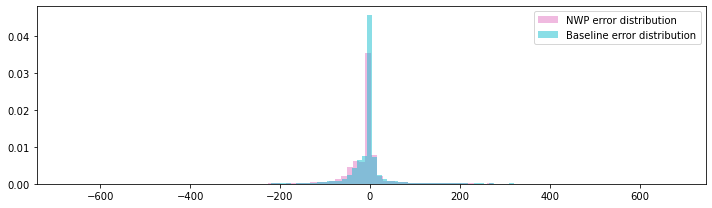

In [6]:
database.base('ghi')

Baseline RMSE : 40.70 | NWP RMSE : 61.03
Baseline MAE  : 18.45 | NWP MAE  : 27.15


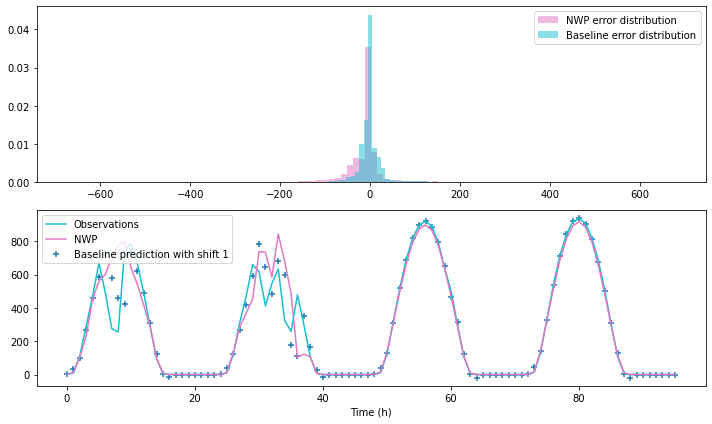

In [7]:
database.evaluate('ghi', plot_graph=True)

Baseline RMSE : 62.97 | NWP RMSE : 61.03
Baseline MAE  : 41.48 | NWP MAE  : 27.15


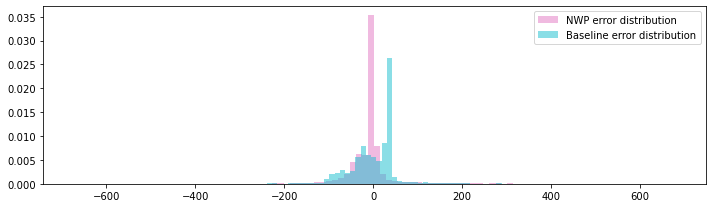

In [8]:
database.evaluate('ghi', observation_only=True)

Baseline RMSE : 40.64 | NWP RMSE : 61.03
Baseline MAE  : 18.43 | NWP MAE  : 27.15


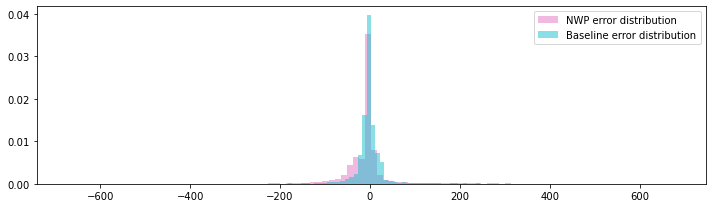

In [9]:
database.evaluate('ghi', ['date'])

### Wind

#### Wind speed

Baseline RMSE : 1.55 | NWP RMSE : 1.88
Baseline MAE  : 1.16 | NWP MAE  : 1.38


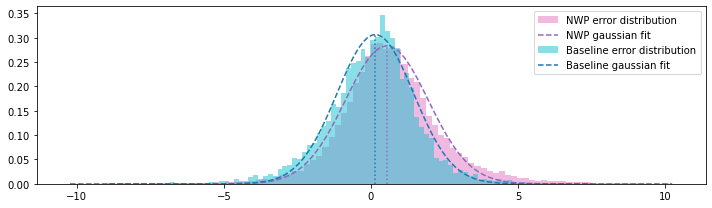

In [10]:
database.base('ws')

Baseline RMSE : 1.03 | NWP RMSE : 1.88
Baseline MAE  : 0.72 | NWP MAE  : 1.38


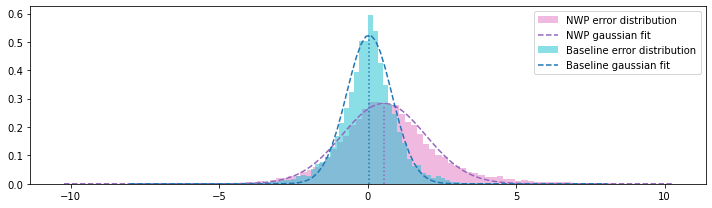

In [11]:
database.evaluate('ws', observation_only=True)
auto_reg_coeff = database.coef
auto_reg_intercept = database.intercept

Baseline RMSE : 0.94 | NWP RMSE : 1.88
Baseline MAE  : 0.66 | NWP MAE  : 1.38


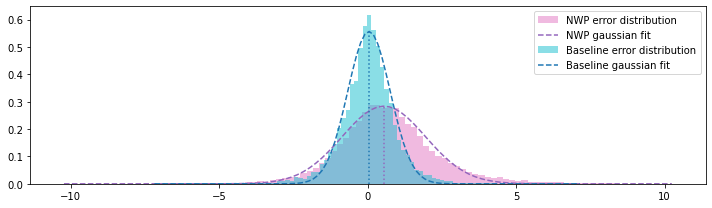

In [12]:
database.evaluate('ws')
baseline_coeff = database.coef
baseline_intercept = database.intercept

Baseline RMSE : 0.94 | NWP RMSE : 1.88
Baseline MAE  : 0.66 | NWP MAE  : 1.38


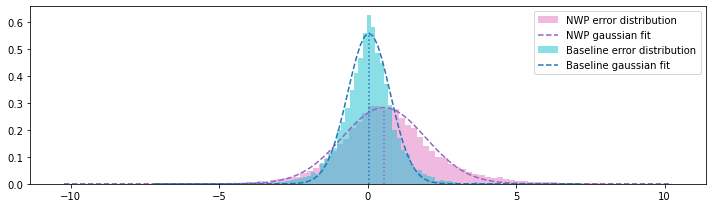

In [13]:
database.evaluate('ws', ['ghi', 'date'], n_input=6)

#### Wind speed coefficients comparison

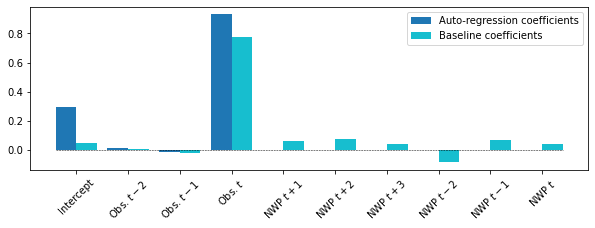

In [14]:
xTicks = [
    'Intercept', 'Obs. $t - 2$', 'Obs. $t - 1$', 'Obs. $t$', 'NWP $t + 1$',
    'NWP $t + 2$', 'NWP $t + 3$', 'NWP $t - 2$', 'NWP $t - 1$', 'NWP $t$'
]

plt.figure(figsize=(10, 3))
plt.plot([-.4, 9.4], [0., 0.], '--', color='black', linewidth=.5)
plt.bar([0], auto_reg_intercept, width=-.4, align='edge', color='tab:blue')
plt.bar([0], baseline_intercept, width=.4, align='edge', color='tab:cyan')
plt.bar([1, 2, 3], auto_reg_coeff.flatten(), width=-.4, align='edge', color='tab:blue', label='Auto-regression coefficients')
plt.bar(np.arange(1, 10), baseline_coeff.flatten(), width=.4, align='edge', color='tab:cyan', label='Baseline coefficients')
plt.xticks(np.arange(10), xTicks, rotation=45)
plt.legend()

#### Wind direction

Baseline RMSE : 58.69 | NWP RMSE : 85.74
Baseline MAE  : 33.00 | NWP MAE  : 47.98


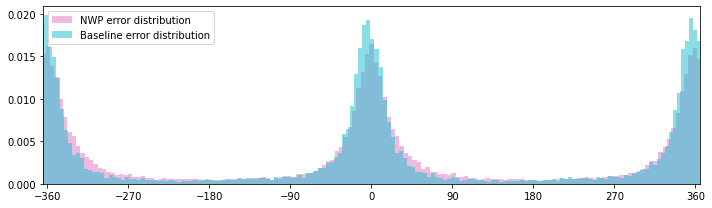

In [15]:
database.evaluate('wd')

#### Wind cartesian coordinates

Baseline RMSE : 1.09 | NWP RMSE : 1.97
Baseline MAE  : 0.74 | NWP MAE  : 1.43


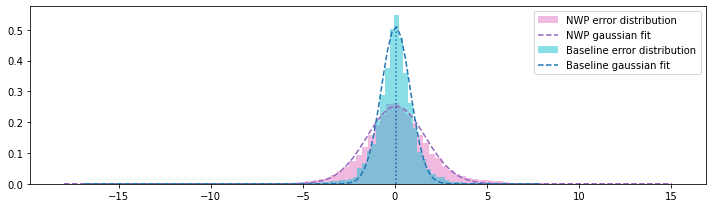

In [16]:
database.evaluate('wx')

Baseline RMSE : 1.12 | NWP RMSE : 2.24
Baseline MAE  : 0.75 | NWP MAE  : 1.62


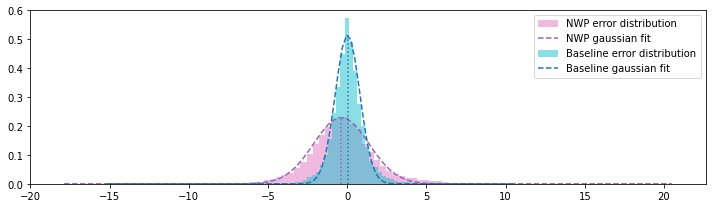

In [17]:
database.evaluate('wy')

Baseline RMSE : 1.25 | NWP RMSE : 2.24
Baseline MAE  : 0.82 | NWP MAE  : 1.62


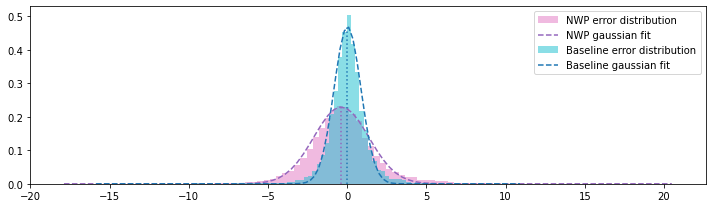

In [18]:
database.evaluate('wy', observation_only=True)

### Temperature

Baseline RMSE : 0.87 | NWP RMSE : 0.81
Baseline MAE  : 0.66 | NWP MAE  : 0.60


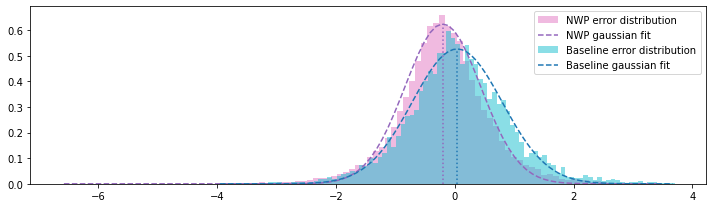

In [19]:
database.base('t')

Baseline RMSE : 0.29 | NWP RMSE : 0.81
Baseline MAE  : 0.19 | NWP MAE  : 0.60


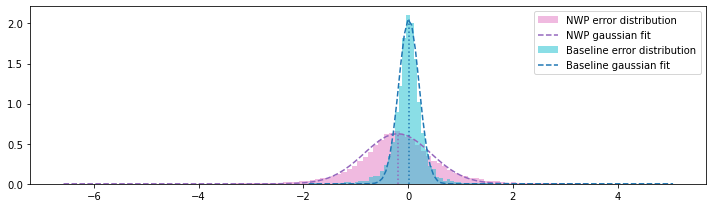

In [20]:
database.evaluate('t')
baseline_coeff = database.coef
baseline_intercept = database.intercept

Baseline RMSE : 0.29 | NWP RMSE : 0.81
Baseline MAE  : 0.19 | NWP MAE  : 0.60


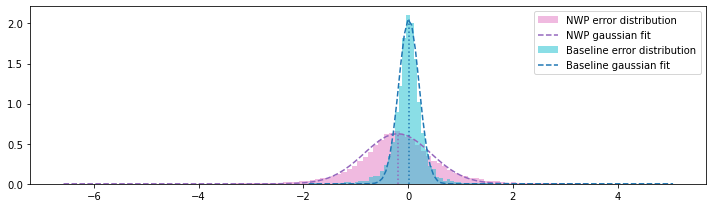

In [21]:
database.evaluate('t', normalization=True)

Baseline RMSE : 0.29 | NWP RMSE : 0.81
Baseline MAE  : 0.19 | NWP MAE  : 0.60


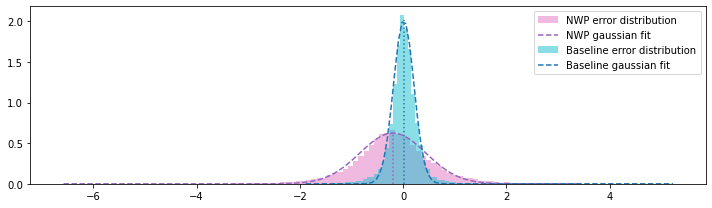

In [22]:
database.evaluate('t', ['ghi', 'date'])

Baseline RMSE : 0.31 | NWP RMSE : 0.81
Baseline MAE  : 0.20 | NWP MAE  : 0.60


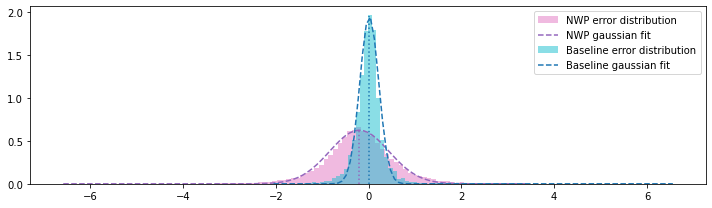

In [23]:
database.evaluate('t', observation_only=True)
auto_reg_coeff = database.coef
auto_reg_intercept = database.intercept

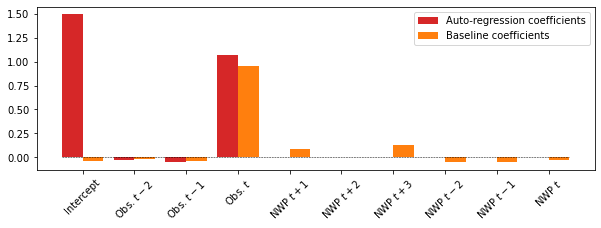

In [24]:
xTicks = [
    'Intercept', 'Obs. $t - 2$', 'Obs. $t - 1$', 'Obs. $t$', 'NWP $t + 1$',
    'NWP $t + 2$', 'NWP $t + 3$', 'NWP $t - 2$', 'NWP $t - 1$', 'NWP $t$'
]

plt.figure(figsize=(10, 3))
plt.plot([-.4, 9.4], [0., 0.], '--', color='black', linewidth=.5)
plt.bar([0], auto_reg_intercept, width=-.4, align='edge', color='tab:red')
plt.bar([0], baseline_intercept, width=.4, align='edge', color='tab:orange')
plt.bar([1, 2, 3], auto_reg_coeff.flatten(), width=-.4, align='edge', color='tab:red', label='Auto-regression coefficients')
plt.bar(np.arange(1, 10), baseline_coeff.flatten(), width=.4, align='edge', color='tab:orange', label='Baseline coefficients')
plt.xticks(np.arange(10), xTicks, rotation=45)
plt.legend()